# Lab 1 – Data analysis
### PYU33C01, Computer Simulation I: Computational Methods (Mitchison)

In [2]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
# Increase the font size to 16
plt.rcParams.update({'font.size': 16})

# This reads each line of the data file and stores it as an array of strings
data = np.loadtxt('planets_2024.csv', delimiter=',', dtype=str)

/tmp/ipykernel_19678/2826438004.py:8: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  data = np.loadtxt('planets_2024.csv', delimiter=',', dtype=str)


The first row contains the column labels

In [3]:
labels = data[0]
print(labels)

['pl_name' 'hostname' 'disc_year' 'disc_facility' 'pl_orbsmax' 'pl_bmassj'
 'st_mass' 'sy_dist']


Subsequent rows contain data for each planet, e.g. this prints the name and mass of the first planet on the list:

In [4]:
print('Name:', data[1,0], '\nMass:', data[1,5], 'Jupiter masses')

Name: 11 Com b 
Mass: 15.46400 Jupiter masses


We can now use array slicing and typecasting to extract the data:

In [5]:
# Planet names (the first row containing the labels is excluded)
names = data[1:,0]
# Years of discovery (typecast as integers)
years = data[1:,2].astype(int)

print(years)

[2007 2009 2008 ... 1999 2021 2007]


Now we can use NumPy tools to explore the data set. For example, let's use argsort() to find the first ten planets that were discovered.

In [6]:
# Indices that sort the years chronologically
inds = years.argsort()      #finds the nth number assciated with the chronological year
print(inds[10:30])

# These two lines of code do the same thing: sort the years in increasing order
sorted_years = years[inds]
sorted_years = np.sort(years)
print(sorted_years[:10])

[5751  305  837  759  887  811  916  832  782 1221  624  608 5762  304
 1175  515  885  947 1346 5763]
[1992 1992 1994 1995 1996 1996 1996 1996 1996 1996]


In [7]:
# Pick out indices corresponding to the first ten database entries (sorted chronologically)
ind = inds[:10]

# Print the name and year of discovery for the first ten exoplanets that were discovered
print('%-20s %-4s' %('Planet', 'Year'))
print('-'*25)
for ii in ind:
    print('%-20s %-4i' %(names[ii], years[ii]))

Planet               Year
-------------------------
PSR B1257+12 d       1992
PSR B1257+12 c       1992
PSR B1257+12 b       1994
51 Peg b             1995
47 UMa b             1996
55 Cnc b             1996
ups And b            1996
tau Boo b            1996
70 Vir b             1996
16 Cyg B b           1996


#### A quick fix.....  
Some of the fields are missing for certain stars, which could cause difficulty.  
More advanced database packages, like pandas, can account for this.   
For now, we'll use a quick fix and replace all the empty fields with '0'.


In [8]:
data[np.nonzero(data=='')] = '0'

## Exercise 1
Find all planets with mass more than 25 times Jupiter's mass (the unit used in the database).   
Print their names, masses, and year of discovery.   
Order the list chronologically.

In [9]:
# Make an array of planet masses
masses = data[1:,5].astype(float)
print(masses[:6])

[15.464 14.74   3.559  8.053  1.78   4.32 ]


In [10]:
# Find the indices of planets with masses greater than 25 Jupiters
big_planets = np.nonzero(masses>25.0)   #nonzwero thing does nothibg here but is valuable later    
names[big_planets]  # this automatically prints the names of the big planets

big_inds_p = np.sort(np.argsort(big_planets))

In [11]:
# Find the indices that sort the years chronologically (you only need to sort the discovery years of the big planets)
#find the years for the big planets, sort those yearrs chronologically and print the indices
big_ind_y = np.sort(np.argsort(years[big_planets]))

# Print the results
print(big_ind_y  == big_inds_p)

print('The indices for the big planets match the indices of the years for the big planets -- correct')

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True]]
The indices for the big planets match the indices of the years for the big planets -- correct


## Exercise 2
How many instances are there of each system size? (The system size is the number of planets orbiting a given host star.)      
Make a plot of system size versus the number of instances. Remember: [always label your axes](https://xkcd.com/833)!    
Save the figure to a pdf file and check that it has saved properly.

In [12]:
# Generate an array of unique star names , ignoring the 'a, b' whatever letter at the end
stars_all = data[1:,1]
stars = np.unique(stars_all)

print(stars)
# Go through the database and count how many times each star appears
#iterate thrugh all names, add a count to the unique name -- create a tuple of name, count

count = 1
#star_tuple = [(stars[1], count)]

#print(star_tuple)

star_dic = {}

for i in range(len(stars)):
    count = 0
    for x in range(len(stars_all)):
        if stars_all[x] == stars[i]:
            count = count + 1
        star_dic[stars[i]] = count
    print('We have now finished', stars[i], 'there are ', len(stars) - i, 'left to go')


['11 Com' '11 UMi' '14 And' ... 'ups And' 'ups Leo' 'xi Aql']
We have now finished 11 Com there are  4310 left to go
We have now finished 11 UMi there are  4309 left to go
We have now finished 14 And there are  4308 left to go
We have now finished 14 Her there are  4307 left to go
We have now finished 16 Cyg B there are  4306 left to go
We have now finished 17 Sco there are  4305 left to go
We have now finished 18 Del there are  4304 left to go
We have now finished 1RXS J160929.1-210524 there are  4303 left to go
We have now finished 24 Boo there are  4302 left to go
We have now finished 24 Sex there are  4301 left to go
We have now finished 2MASS J01033563-5515561 A there are  4300 left to go
We have now finished 2MASS J01225093-2439505 there are  4299 left to go
We have now finished 2MASS J02192210-3925225 there are  4298 left to go
We have now finished 2MASS J0249-0557 A there are  4297 left to go
We have now finished 2MASS J03590986+2009361 there are  4296 left to go
We have now fi

 6 Lyn there are  4280 left to go
We have now finished 61 Vir there are  4279 left to go
We have now finished 7 CMa there are  4278 left to go
We have now finished 70 Vir there are  4277 left to go
We have now finished 75 Cet there are  4276 left to go
We have now finished 8 UMi there are  4275 left to go
We have now finished 81 Cet there are  4274 left to go
We have now finished 91 Aqr there are  4273 left to go
We have now finished AB Aur there are  4272 left to go
We have now finished AB Pic there are  4271 left to go
We have now finished AF Lep there are  4270 left to go
We have now finished AU Mic there are  4269 left to go
We have now finished BD+03 2562 there are  4268 left to go
We have now finished BD+14 4559 there are  4267 left to go
We have now finished BD+15 2375 there are  4266 left to go
We have now finished BD+15 2940 there are  4265 left to go
We have now finished BD+20 2457 there are  4264 left to go
We have now finished BD+20 274 there are  4263 left to go
We have no

In [22]:

l_count = list(star_dic.values())       #list of the count sizes from the dictionary
# Make a list of the possible system sizes
possible_system_sizes = np.unique(l_count)
print('The possible number of planets each star can have is:', possible_system_sizes)

# Count how many times each system size occurs

#i have a dictionary stars_dic that returns the number of planets (ie, number of times the star appears), per name of star
#I have a list (l_count) of all the number of planets 
#I need to sort how many times each number appears, and plot that -- system size versus frequency

# counter -- from -- https://www.tutorialspoint.com/list-frequency-of-elements-in-python
# importing the module
import collections

# using Counter to find frequency of elements
frequency = collections.Counter(l_count)

# printing the frequency
print(dict(frequency))

The possible number of planets each star can have is: [1 2 3 4 5 6 7 8]
{1: 3347, 2: 642, 3: 205, 5: 27, 4: 76, 6: 11, 8: 1, 7: 1}


<Figure size 640x480 with 0 Axes>

dict_values([3347, 642, 205, 27, 76, 11, 1, 1])


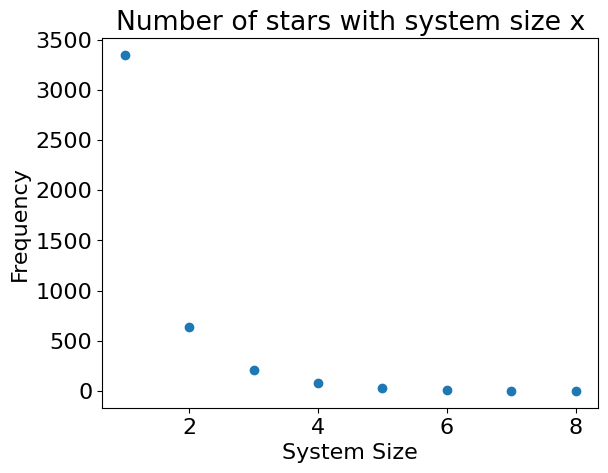

In [32]:
print(dict(frequency).values())

# Plot the results
plt.scatter(dict(frequency).keys(), dict(frequency).values())

plt.title("Number of stars with system size x")      # Title of the plot
plt.ylabel("Frequency")                      # Label for x-axis
plt.xlabel("System Size")  


# Save the plot
plt.savefig('system_size.png', bbox_inches = 'tight')

## Exercise 3
What is the mass distribution among super-Jupiters that have been found?    
Focus on planets with more than Jupiter's mass. 
Plot (i.e. [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) the distribution of planet masses and save the resulting figure.  
Calculate and print the mean, median, and standard deviation of the distribution. Remember: always state the units!

In [14]:
# Make a list of non-zero masses
masses = ????

# Restrict the list to planets with more than Jupiter's mass


# Compute mean, median etc.


# Make a histogram


# Save the histogram


# Print the mean, median and standard deviation



SyntaxError: invalid syntax (3203290335.py, line 2)

## Exercise 4
How has the detection sensitivity in terms of planet mass changed over time?    
For each year, find the maximum and minimum mass of the planets discovered.     
Plot these maximum and minimum masses as two curves against time, including a [legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html). Use a logarithmic scale for mass.